# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [74]:
# Data import

import pandas as pd

df = pd.read_csv('csvs/Wholesale_Data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [75]:
# - Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.

# Check for missing values in the dataset

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [76]:
# No missing values, check data types

data_types = df.dtypes
print(data_types)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [77]:
# Check for duplicate rows

duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [78]:
# Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

summary_statistics = {
    'mean': df.mean(),
    'median': df.median(),
    'std_dev': df.std()
}

summary_df = pd.DataFrame(summary_statistics)

print("Summary Statistics:\n", summary_df)

Summary Statistics:
                           mean  median       std_dev
Channel               1.322727     1.0      0.468052
Region                2.543182     3.0      0.774272
Fresh             12000.297727  8504.0  12647.328865
Milk               5796.265909  3627.0   7380.377175
Grocery            7951.277273  4755.5   9503.162829
Frozen             3071.931818  1526.0   4854.673333
Detergents_Paper   2881.493182   816.5   4767.854448
Delicassen         1524.870455   965.5   2820.105937


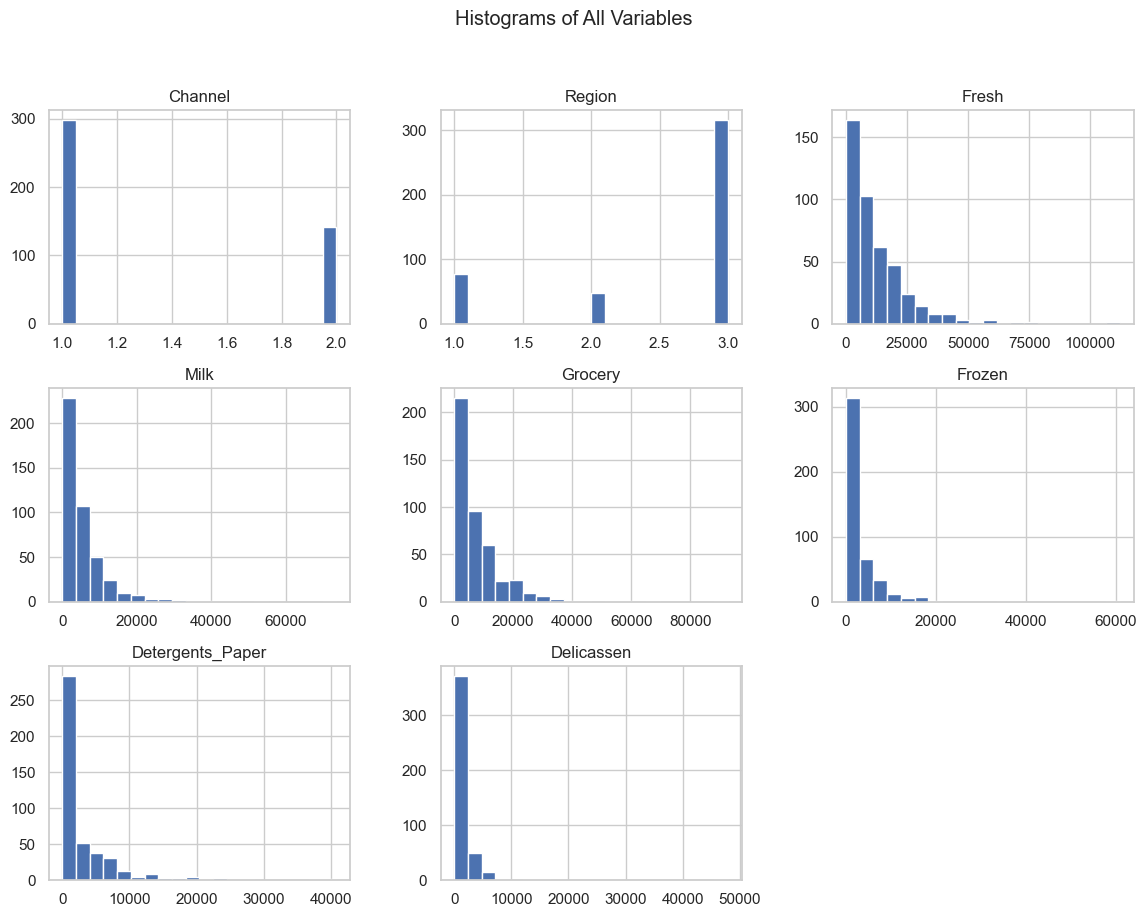

In [79]:
# Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograms

df.hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.suptitle('Histograms of All Variables')
plt.show()

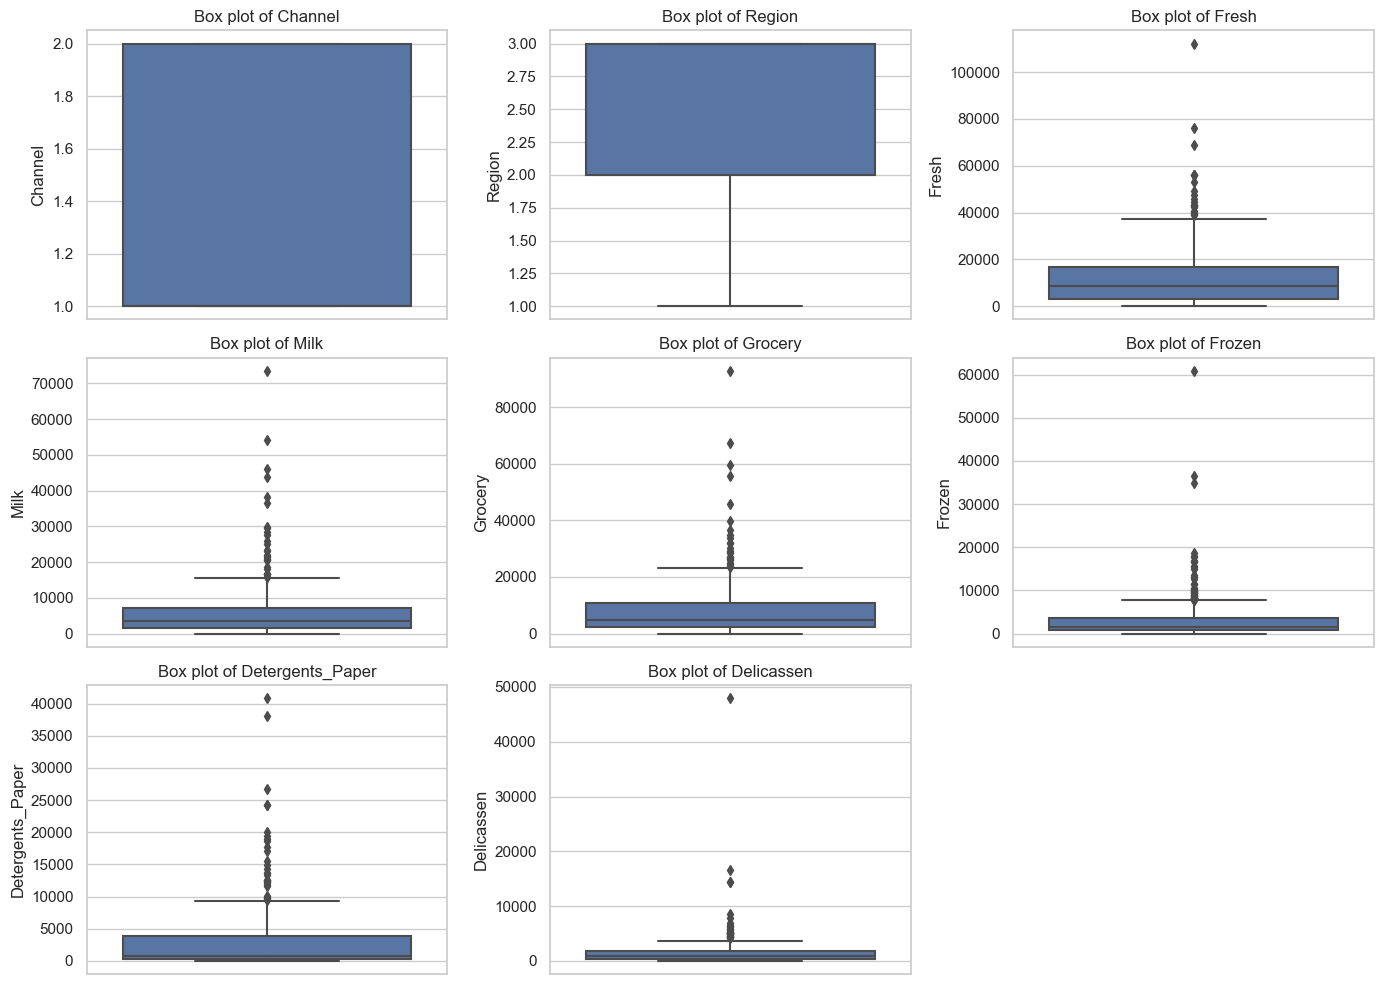

In [80]:
# Box plots

plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

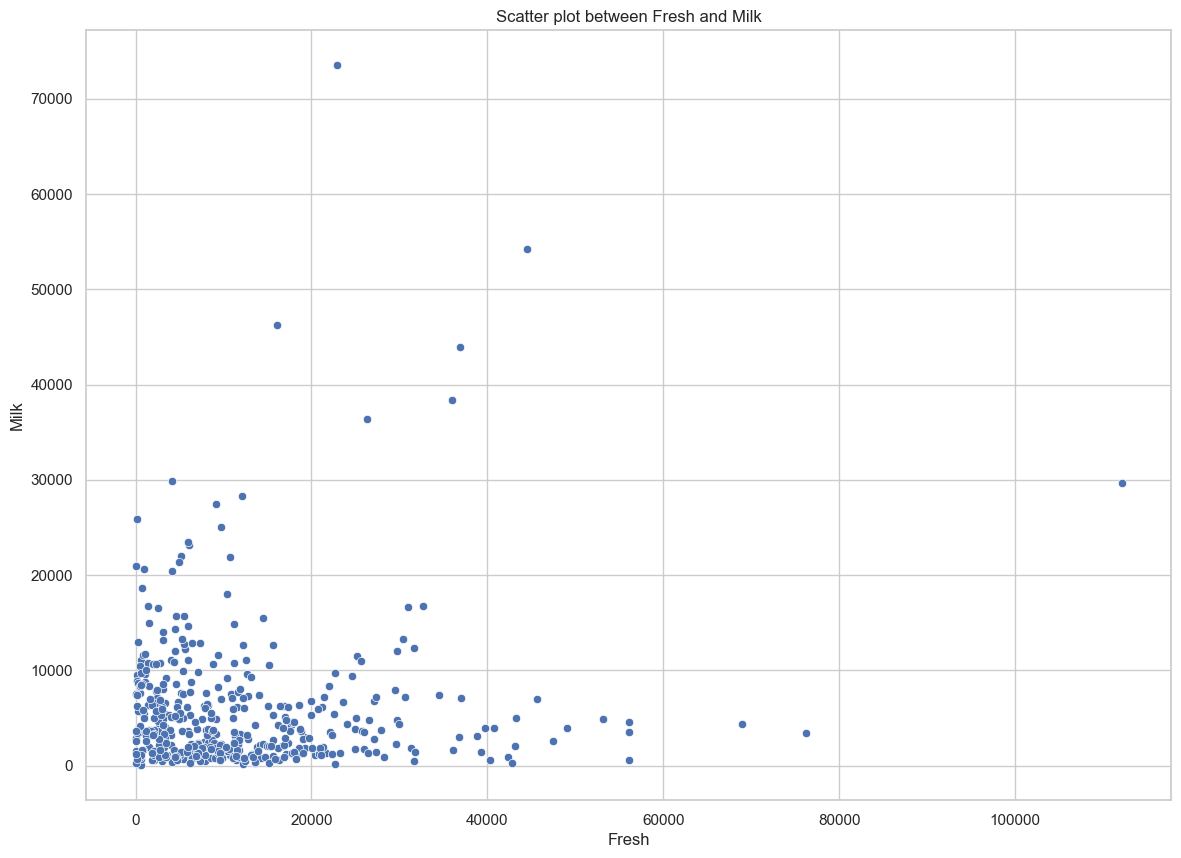

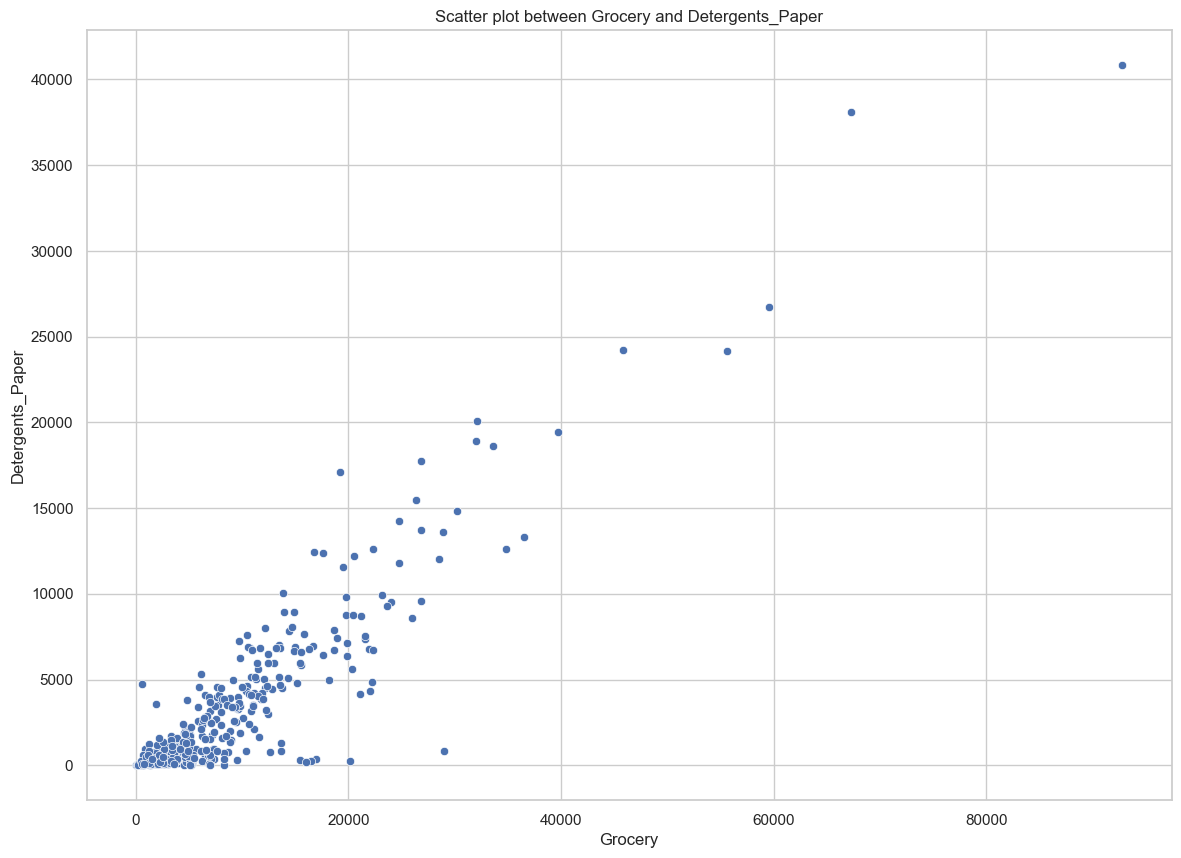

In [81]:
# Scatter plots

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Fresh', y='Milk')
plt.title('Scatter plot between Fresh and Milk')
plt.show()

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Grocery', y='Detergents_Paper')
plt.title('Scatter plot between Grocery and Detergents_Paper')
plt.show()

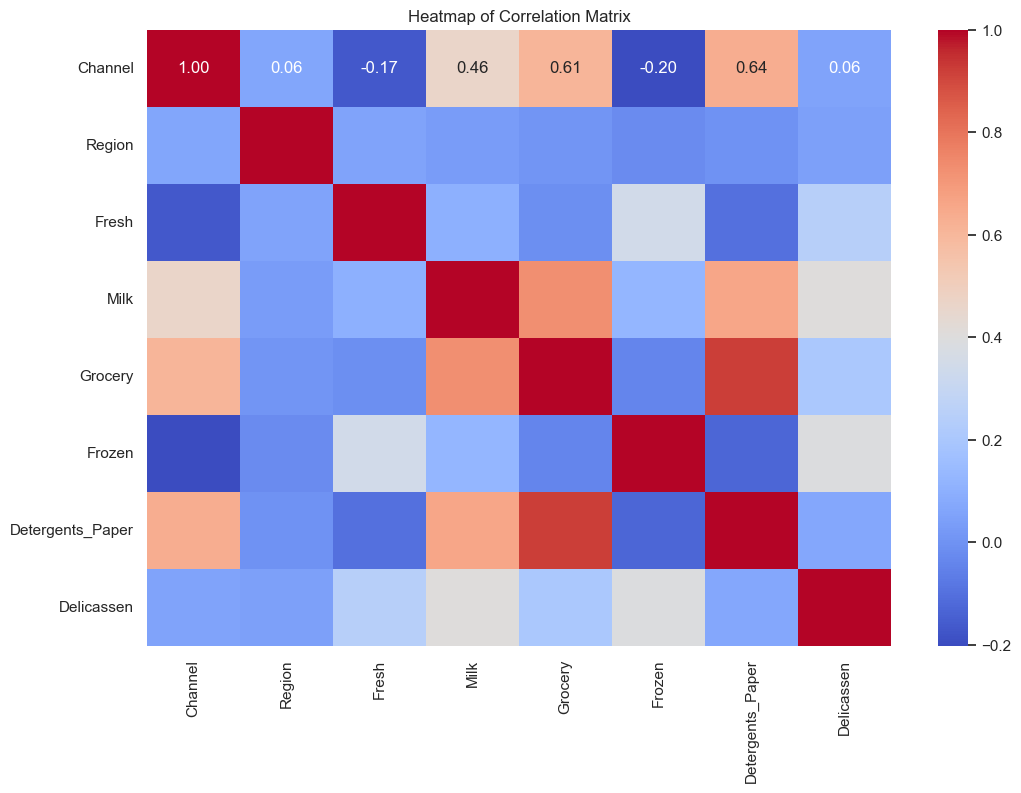

In [82]:
# Heatmap of the correlation matrix

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [83]:
# Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.

# Function to detect outliers using IQR

def detect_outliers_iqr(df):
    outliers_dict = {}
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for column in df.columns:
        outliers = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]
        outliers_dict[column] = outliers
    
    return outliers_dict

# Detect outliers

outliers = detect_outliers_iqr(df)


In [84]:
# Display the number of outliers in each column

for column, outliers_df in outliers.items():
    print(f"{column}: {len(outliers_df)} outliers")

Channel: 0 outliers
Region: 0 outliers
Fresh: 20 outliers
Milk: 28 outliers
Grocery: 24 outliers
Frozen: 43 outliers
Detergents_Paper: 30 outliers
Delicassen: 27 outliers


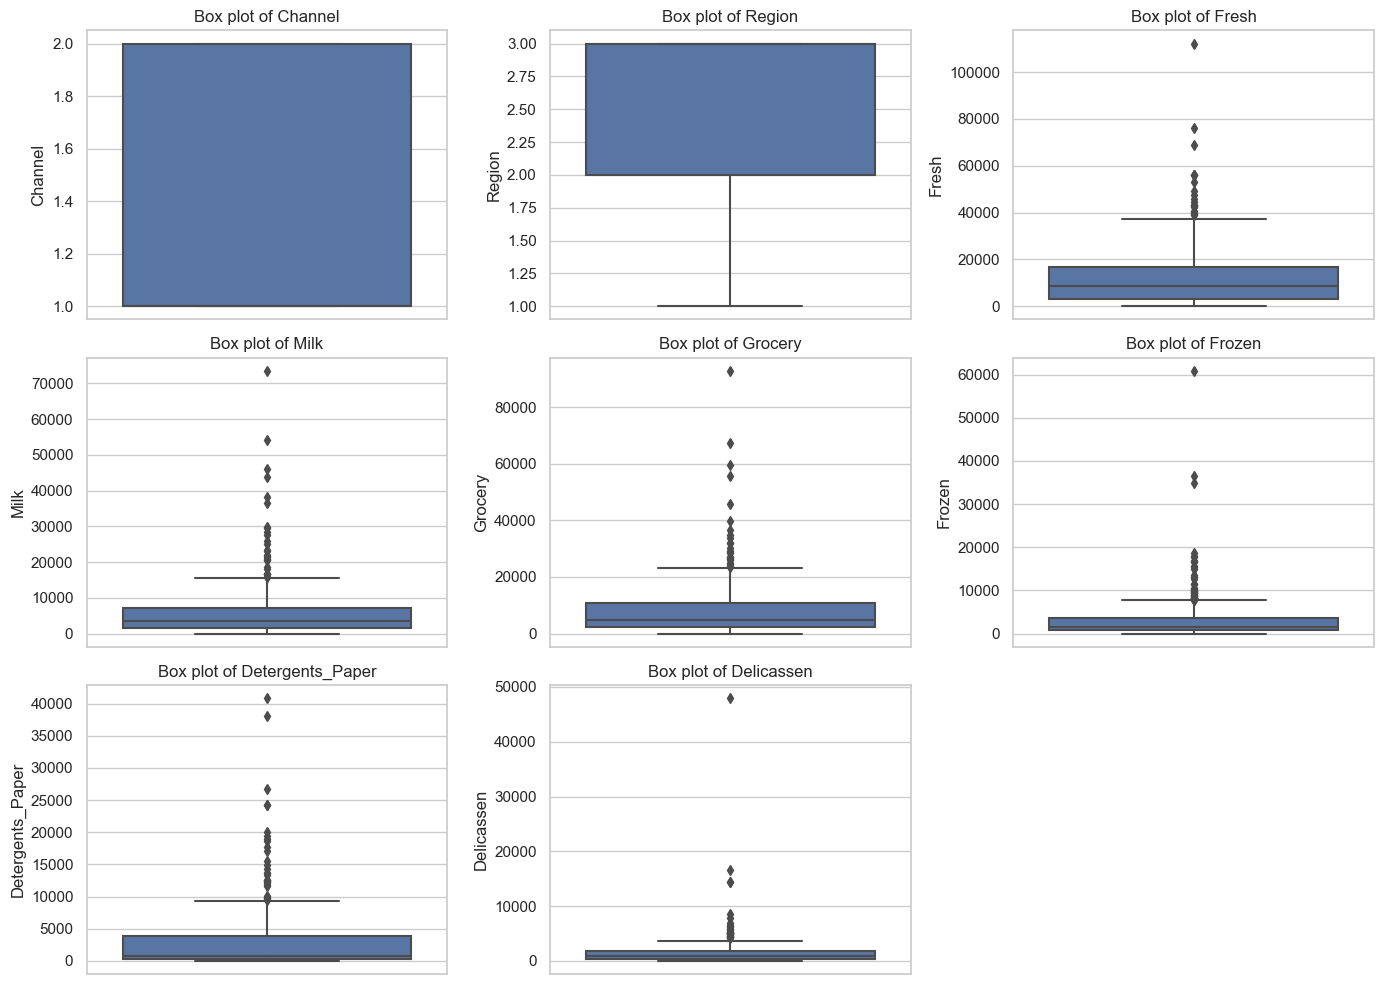

In [85]:
# Visualize the outliers using box plots to see validity

plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [86]:
# Print some example outliers for investigation

for column, outliers_df in outliers.items():
    print(f"\nOutliers in {column}:\n", outliers_df.head())

df.head()


Outliers in Channel:
 Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []

Outliers in Region:
 Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []

Outliers in Fresh:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
29        1       3  43088   2100     2609    1200              1107   
39        1       3  56159    555      902   10002               212   
47        2       3  44466  54259    55571    7782             24171   
52        2       3  40721   3916     5876     532              2587   
87        1       3  43265   5025     8117    6312              1579   

    Delicassen  
29         823  
39        2916  
47        6465  
52        1278  
87       14351  

Outliers in Milk:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23        2       3  26373  36423    22019    5154              4337   
28       

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [87]:
# Outlier to total data comparison 

total_data_points = df.shape[0]
outlier_indices = set()
for outliers_df in outliers.values():
    outlier_indices.update(outliers_df.index)

total_outliers = len(outlier_indices)

print("Total number of data points:", total_data_points)
print("Total number of outliers:", total_outliers)

Total number of data points: 440
Total number of outliers: 108


In [89]:
# Remove outliers

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_cleaned

df_cleaned = remove_outliers_iqr(df)

# Output the number of rows before and after cleaning

print("Number of rows before removing outliers:", df.shape[0])
print("Number of rows after removing outliers:", df_cleaned.shape[0])

df_cleaned.head()

file_path = 'csvs/cleaned_data.csv'

# Save the DataFrame to a CSV file

df_cleaned.to_csv(file_path, index=False)

Number of rows before removing outliers: 440
Number of rows after removing outliers: 332


In [90]:
# Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

correlation_matrix = df_cleaned.corr()

print(correlation_matrix)

# Example: Correlation between "Grocery" and "Detergents_Paper"

grocery_detergents_paper_corr = correlation_matrix.loc['Grocery', 'Detergents_Paper']
print("Correlation between Grocery and Detergents_Paper:", grocery_detergents_paper_corr)

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.126127 -0.113467  0.628692  0.722198 -0.199590   
Region            0.126127  1.000000  0.000641  0.077833  0.068735 -0.099538   
Fresh            -0.113467  0.000641  1.000000 -0.078081 -0.116159  0.184733   
Milk              0.628692  0.077833 -0.078081  1.000000  0.727206 -0.154348   
Grocery           0.722198  0.068735 -0.116159  0.727206  1.000000 -0.199533   
Frozen           -0.199590 -0.099538  0.184733 -0.154348 -0.199533  1.000000   
Detergents_Paper  0.784068  0.075176 -0.226385  0.683223  0.854322 -0.203810   
Delicassen        0.230007  0.038446  0.179424  0.313687  0.273234  0.050886   

                  Detergents_Paper  Delicassen  
Channel                   0.784068    0.230007  
Region                    0.075176    0.038446  
Fresh                    -0.226385    0.179424  
Milk                      0.683223    0.313687  
Grocery                   0.854322

In [91]:
# Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

# Normalization

scaler_minmax = MinMaxScaler()
df_normalized = scaler_minmax.fit_transform(df_cleaned)

# Convert back to DataFrame

df_normalized = pd.DataFrame(df_normalized, columns=df_cleaned.columns)

normalized_path = 'csvs/normalized_data.csv'

df_normalized.to_csv(normalized_path, index=False)

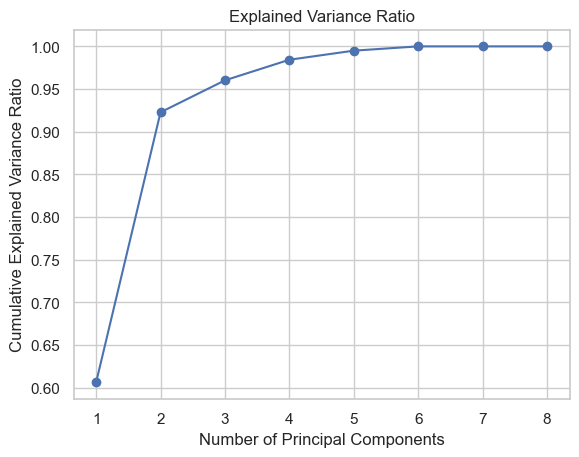

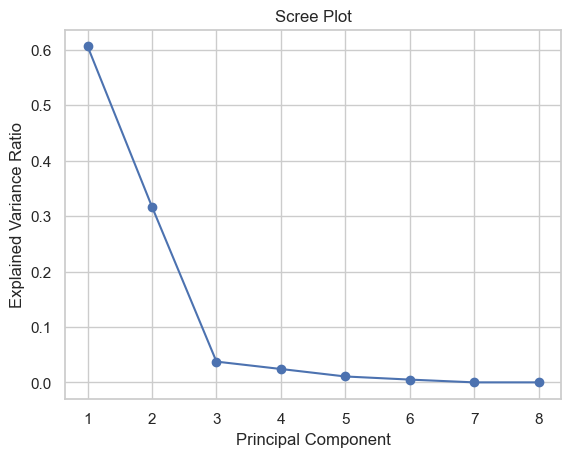

Principal Component 1 Loadings:
Channel: -1.2288249696896448e-05
Region: -1.1000682869059392e-06
Fresh: 0.977814723725406
Milk: -0.0811750587258534
Grocery: -0.15791136472543038
Frozen: 0.045137468163794714
Detergents_Paper: -0.10069137634707234
Delicassen: 0.013297832233044994

Principal Component 2 Loadings:
Channel: 5.4860901549101906e-05
Region: 1.021610910934343e-05
Fresh: 0.20202185170563625
Milk: 0.46234853717255997
Grocery: 0.7976650171002848
Frozen: -0.04653126987527119
Detergents_Paper: 0.3235887470406384
Delicassen: 0.04771459630553433

Principal Component 3 Loadings:
Channel: 1.6709559854471325e-06
Region: -8.137869965620112e-06
Fresh: 0.016004966499768666
Milk: -0.8780482085450717
Grocery: 0.45866615802395805
Frozen: -0.05037769907203303
Detergents_Paper: 0.11444669852979297
Delicassen: -0.052579278851046574

Principal Component 4 Loadings:
Channel: -9.858156082857342e-06
Region: -4.222737269894757e-05
Fresh: -0.03549686555269011
Milk: -0.02154710092416414
Grocery: 0.07145

In [92]:
# Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

from sklearn.decomposition import PCA

pca = PCA()

# Fit PCA to the data

pca.fit(df_cleaned)

# Access explained variance ratio

explained_variance_ratio = pca.explained_variance_ratio_

# Access loadings (weights)

loadings = pca.components_

# Plot explained variance ratio

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

# Plot scree plot

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Print principal component loadings

for i, component in enumerate(loadings, 1):
    print(f"Principal Component {i} Loadings:")
    for j, feature in enumerate(df_cleaned.columns):
        print(f"{feature}: {component[j]}")
    print()

the most important features contributing to the overall variance in the dataset are "Fresh", "Grocery", "Milk", "Detergents_Paper", "Frozen", and "Delicassen".

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [93]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

c:\Users\turab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\turab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\turab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\turab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

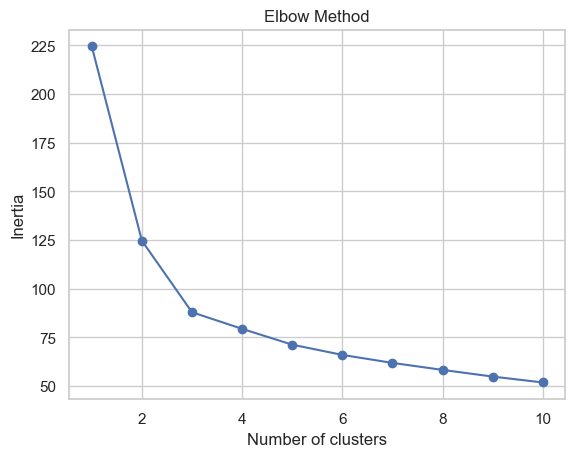

In [94]:
# Plot the elbow curve

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [95]:
optimal_k = 3

# Initialize and fit k-means with the optimal number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_normalized)

c:\Users\turab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\turab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [96]:
# Assign clusters and get cluster centers

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [97]:
# Check for convergence

max_iterations = 100


if kmeans.n_iter_ < max_iterations:
    print(f"Convergence reached after {kmeans.n_iter_} iterations.")
else:
    print("Maximum number of iterations reached without convergence.")


Convergence reached after 3 iterations.


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

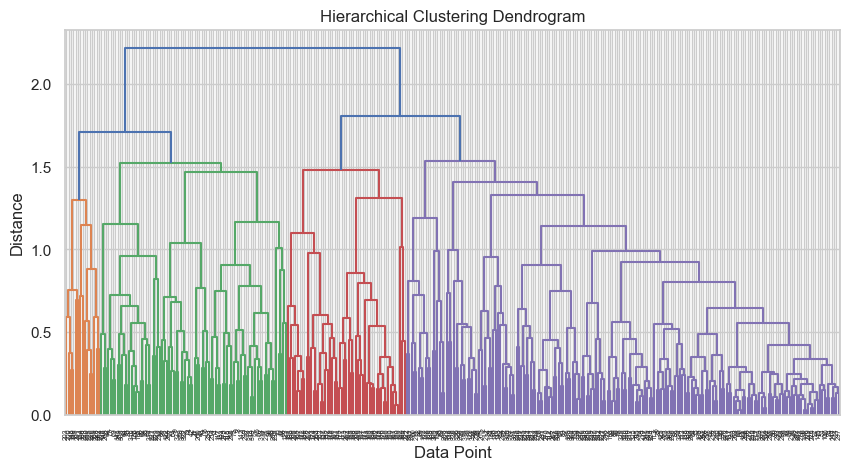

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the proximity/distance matrix

distance_matrix = linkage(df_normalized, method='complete', metric='euclidean')

# Plot the dendrogram

plt.figure(figsize=(10, 5))
dendrogram(distance_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

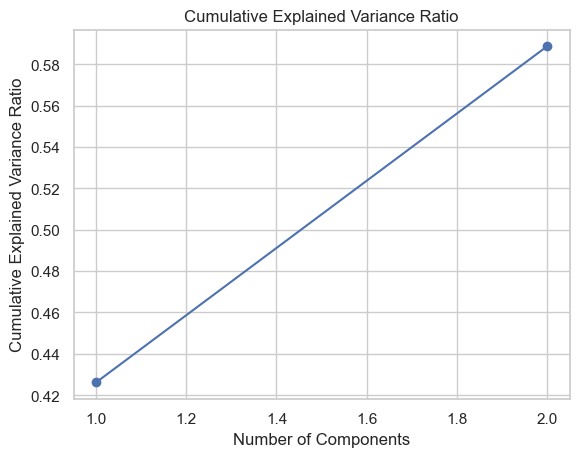

Principal Component 1 Loadings:
Channel: 0.4697049954282491
Region: 0.07850452247477542
Fresh: -0.10562300413132236
Milk: 0.4543593684662287
Grocery: 0.4964329883530821
Frozen: -0.158594189858923
Detergents_Paper: 0.4982130209627867
Delicassen: 0.18921299973034397
Principal Component 2 Loadings:
Channel: 0.005991389859686608
Region: -0.058946840222864345
Fresh: 0.6458676111253663
Milk: 0.11692877749103296
Grocery: 0.03835989694997138
Frozen: 0.4754075019395996
Detergents_Paper: -0.07211298132670131
Delicassen: 0.5770511298824967


In [99]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)

# Perform PCA

pca = PCA(n_components=2)  # Specify the number of components
pca.fit(data_scaled)

# Visualize explained variance ratio

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

# Interpret principal components

components = pca.components_
for i, component in enumerate(components):
    print(f"Principal Component {i + 1} Loadings:")
    for j, feature in enumerate(df_cleaned.columns):
        print(f"{feature}: {component[j]}")


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Different Types of Customers:

The data represents lots of different types of businesses, like restaurants, stores, and hotels. Each type of business buys different things from wholesalers.

Customers Spend Differently:

Some businesses buy a lot of fresh food, while others buy more groceries, cleaning supplies, or frozen food. It shows that different businesses have different needs and buy different things.

Important Products:

Some items like groceries, milk, and cleaning supplies are really important for many businesses. They're the things that get bought the most and are essential for running a business.

Helps Businesses Target Their Customers Better:

Understanding what businesses buy helps wholesalers offer the right products to the right customers. It helps businesses plan better and make sure they have the things their customers need.




